In [1]:
## -------- УПРАЖНЕНИЕ 2 --------
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [2]:
sawtooth = SawtoothSignal().make_wave(duration=0.1, framerate=40000)
sawtooth.make_audio()

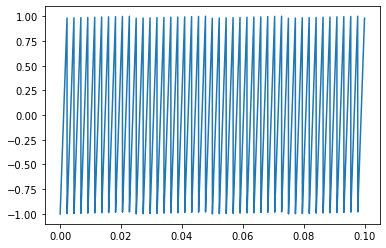

In [3]:
sawtooth.plot()

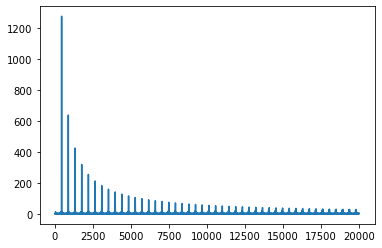

In [4]:
sawtooth.make_spectrum().plot()

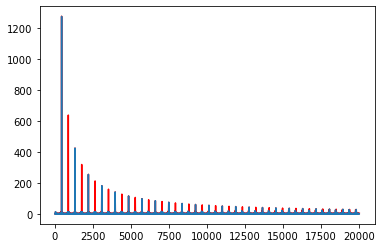

In [5]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.1, framerate=40000)
square.make_spectrum().plot()

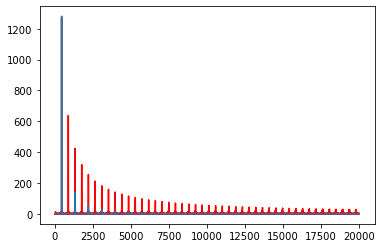

In [6]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.1, framerate=40000)
triangle.make_spectrum().plot()

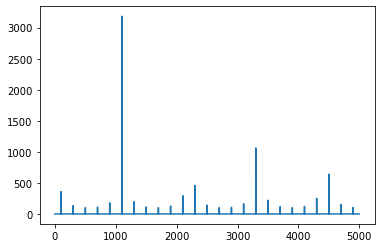

In [7]:
## -------- УПРАЖНЕНИЕ 3 --------
square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square.make_spectrum().plot()

In [8]:
square.make_audio()

In [9]:
from thinkdsp import SinSignal

SinSignal(300).make_wave(duration=0.5, framerate=10000).make_audio()

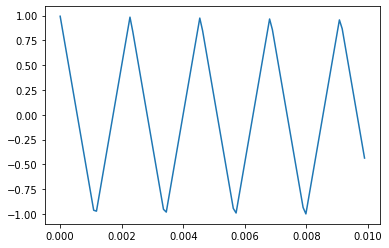

In [10]:
## -------- УПРАЖНЕНИЕ 4 --------
triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()

In [11]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

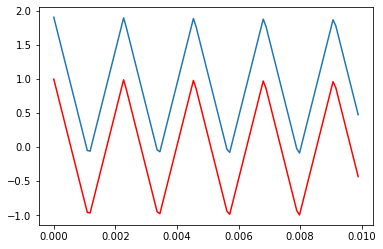

In [12]:
spectrum.hs[0] = 100
triangle.plot(color='red')
spectrum.make_wave().plot()

In [13]:
## -------- УПРАЖНЕНИЕ 5 --------
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [14]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

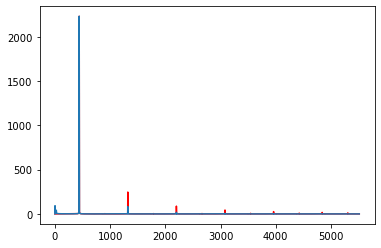

In [15]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='red')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)

In [16]:
filtered = spectrum.make_wave()
filtered.make_audio()

In [17]:
## -------- УПРАЖНЕНИЕ 6 --------
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

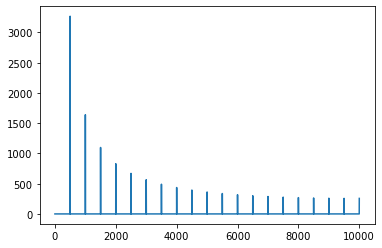

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot()

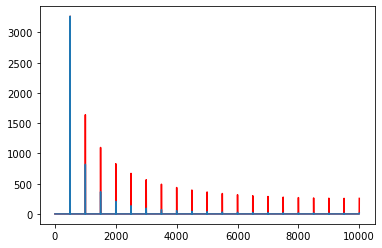

In [19]:
spectrum.plot(color='red')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

In [20]:
wave = spectrum.make_wave()
wave.make_audio()

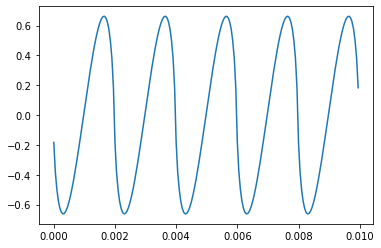

In [21]:
wave.segment(duration=0.01).plot()

In [22]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

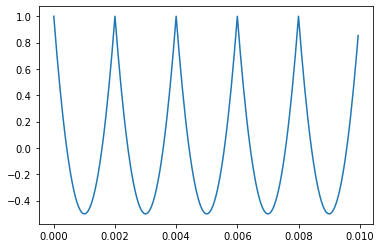

In [23]:
wave.segment(duration=0.01).plot()

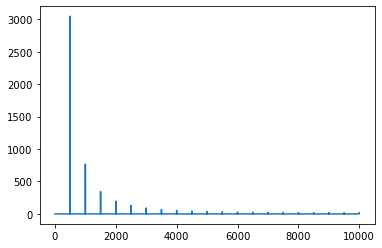

In [24]:
spectrum = wave.make_spectrum()
spectrum.plot()